# SIS variogram inference

In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys

sys.path.append("../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

## Setup a reference model

In [2]:
#grid
sx = 1.5
sy = 1.5
sz = .15
x0 = 0
y0 = 0
z0 = -15
nx = 133
ny = 67
nz = 62
x1 = x0 + nx*sx
y1 = y0 + ny*sy
z1 = z0 + nz

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

In [3]:
def f(p):
    return p*(1-p)

In [115]:
## create pile

P1 = Pile(name = "P1",seed=1)

#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential", {"w":.21,"r":[50, 50, 10]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B1 = gcm.CovModel3D(elem=[("exponential", {"w":.16,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential", {"w":.24,"r":[100, 100, 3]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B3 = gcm.CovModel3D(elem=[("exponential", {"w":.19,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B4 = gcm.CovModel3D(elem=[("exponential", {"w":.13,"r":[100, 100, 4]})], alpha=0, name="vario_SIS") # input variogram

lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelB=[covmodel_SIS_B1, covmodel_SIS_B2, covmodel_SIS_B3, covmodel_SIS_B4] # list of covmodels to pass


#create Lithologies 
dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"homogenous"}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC, "mean":-6.5}
dic_f_C = {"f_method" : "SIS","neig" : 10, "f_covmodel":lst_covmodelC, "probability":[0.3, 0.7]}
C = Unit(name="C", order=2, ID = 2, color="blue", contact="onlap", dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C, contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":-8.5}
dic_f_B = {"f_method":"SIS", "neig" : 10, "f_covmodel":lst_covmodelB, "probability":[0.2, 0.4, 0.25, 0.15]}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB, "mean":-10.5}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added


In [116]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1, facies_2, facies_3, facies_5])
D.add_facies([facies_1])
C.add_facies([facies_4, facies_6])

Facies basement added to unit A
Facies Sand added to unit B
Facies Gravel added to unit B
Facies GM added to unit B
Facies SM added to unit B
Facies Sand added to unit D
Facies Clay added to unit C
Facies Silt added to unit C


In [117]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [118]:
T1 = Arch_table(name = "P1",seed=3)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot)

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##


In [119]:
T1.compute_surf(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.008005619049072266 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.0059566497802734375 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.004958152770996094 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.04089164733886719 s
##########################


### 0.0717768669128418: Total time elapsed for computing surfaces ###


In [120]:
pv.set_jupyter_backend('static')

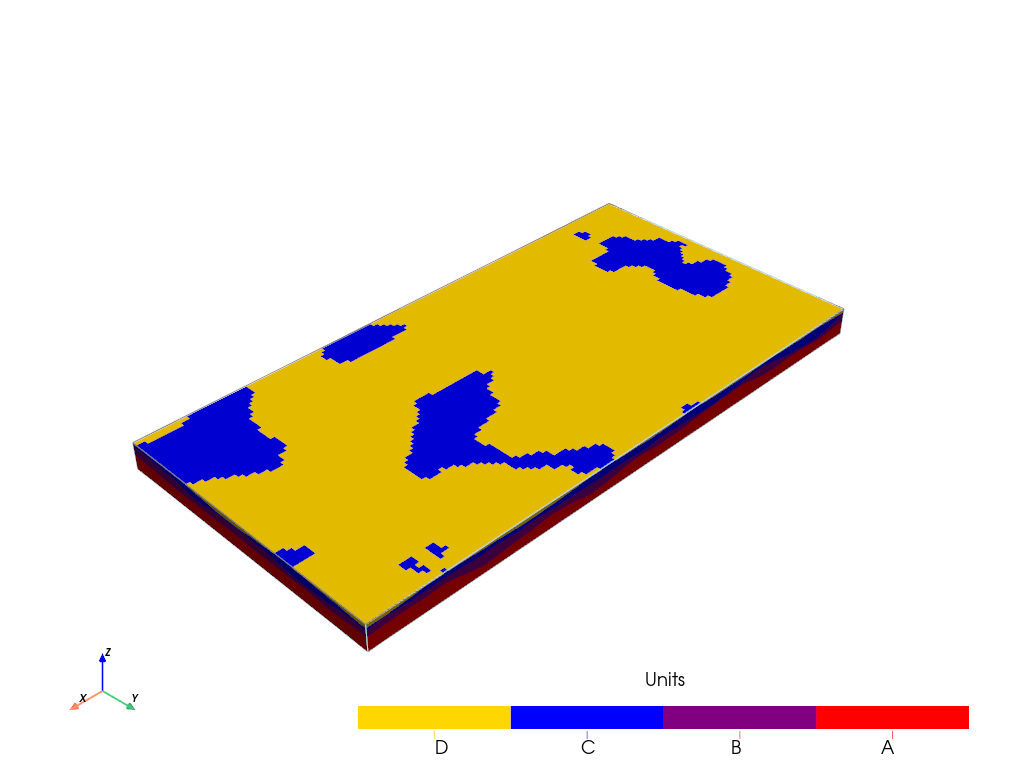

In [121]:
T1.plot_units()

In [122]:
T1.seed = int(11e6)

In [123]:
T1.compute_facies(5, verbose_methods=2)


### Unit D: facies simulation with homogenous method ####
### Unit D - realization 0 ###
Time elapsed 0.01 s

### Unit C: facies simulation with SIS method ####
### Unit C - realization 0 ###
Only one facies covmodels for multiples facies, adapt sill to right proportions
Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20240322 / OpenMP 7 thread(s)]
Geos-Classic run complete
Time elapsed 3.63 s

### Unit B: facies simulation with SIS method ####
### Unit B - realization 0 ###
Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20240322 / OpenMP 7 thread(s)]
Geos-Classic run complete
Time elapsed 6.72 s

### Unit A: facies simulation with homogenous method ####
### Unit A - realization 0 ###
Time elapsed 0.02 s

### 10.38: Total time elapsed for computing facies ###


In [128]:
# compute proportion of facies in each realization

for fa in B.list_facies:
    fa_arr = T1.get_facies()
    fa_arr = fa_arr[0, 3, T1.unit_mask("B").astype(bool)]
    print(fa.name, np.sum(fa_arr == fa.ID)/fa_arr.size)

Sand 0.16738804727817547
Gravel 0.3671474189203505
GM 0.173759401909893
SM 0.29170513189158104


In [188]:
T1.rem_all_bhs()

Standard boreholes removed
Fake boreholes removed
Geological map boreholes removed


In [189]:
np.random.seed(135)
n = 50

x_positions=(np.random.random(size=n) - x0)*x1
y_positions=(np.random.random(size=n) - y0)*y1

# select unique pairs
xy_positions = np.array(list(set(zip(x_positions, y_positions))))
x_positions = xy_positions[:,0]
y_positions = xy_positions[:,1]

l_bhs=T1.make_fake_bh(x_positions, y_positions, faciesIndex=1)[0][0]
T1.add_bh(l_bhs)

Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Bore

In [190]:
pv.set_jupyter_backend('client')

In [191]:
p=pv.Plotter()

T1.plot_facies(iu=0, ifa=1, plotter=p, slicex=(0.15, 0.85), slicey=(0.2, 0.8), inside_units=[B])
T1.plot_bhs("facies", plotter=p)
p.show()

Widget(value='<iframe src="http://localhost:53153/index.html?ui=P_0x258888af450_6&reconnect=auto" class="pyvis…

In [192]:
T1.process_bhs(reprocess=1)

Hard data reset
##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set

 ## Computing distributions for Normal Score Transform ##

Processing ended successfully


## Variogram inference

In [193]:
def get_Ivalues(T1, unit, facies, iu = 0):
    
    """
    Return indicator values (1 if present, 0 if not) of hard data facies contains in given unit
    """

    x, fa_values = T1.hd_fa_in_unit(unit, iu=iu)  # get the data
    x = np.array(x)
    fa_values = np.array(fa_values)

    # setup values
    v = fa_values.copy()
    v[v != facies.ID] = 0
    v[v == facies.ID] = 1
   
    return x, v


def estimate_SIS_covmodel(unit, arch_table, facies, covmodel, iu=0, ndata_min = 100,
                          ignore_factor = 1, hmax=np.nan, bounds=(), plot_varExp=True, alpha_loc_func = None,
                            **kwargs):
    
    """
    Estimate a 3D indicator covmodel according to data of a facies
    
    
    kwargs : arguments for variogramExp3D
    """
    
    
    kwargs_def = {"tol_dist":(10, 10, 5), "tol_angle":(45, 45, 10), "hmax_var" : (np.nan, np.nan, np.nan),
    "ncla" : (10, 10, 10), "cla_center" : (None, None, None), "cla_length" : (None, None, None)}
    
    for k, val in kwargs_def.items():
        if k not in kwargs.keys():
            kwargs[k] = val
    
    #first get x position and indicator values (0 or 1)
    x_pos,v = get_Ivalues(arch_table, unit, facies, iu)
    ndata = len(v)
    if ignore_factor > 1:
        ndata_to_keep = 1/ignore_factor * ndata
        ind = np.random.choice(np.arange(ndata),size=ndata_to_keep)
        x_pos = x_pos[ind]
        v = v[ind]
    
    if ndata < ndata_min:
        print("Too few points")
        return None
    
    #2nd estimate covmodel
    if not plot_varExp:
        make_plot = True
    cm_fitted_3D, popt = gcm.covModel3D_fit(x_pos,np.array(v),covmodel,make_plot=False,
                                        bounds = bounds,hmax = hmax, alpha_loc_func = alpha_loc_func)

    #plot to validate
    if plot_varExp:
        (hexp1, gexp1, cexp1),(hexp2, gexp2, cexp2),(hexp3, gexp3, cexp3) = gcm.variogramExp3D(x_pos,v,
                                                                                               alpha=cm_fitted_3D.alpha,
                                                                                               beta=cm_fitted_3D.beta,
                                                                                               gamma=cm_fitted_3D.gamma,
                                                                                               tol_dist=kwargs["tol_dist"],tol_angle=kwargs["tol_angle"],
                                                                                               make_plot=False,hmax = kwargs["hmax_var"],ncla = kwargs["ncla"],
                                                                                               cla_length = kwargs["cla_length"], cla_center = kwargs["cla_center"],
                                                                                               alpha_loc_func = alpha_loc_func)

        plt.subplots(1,3,figsize=(16,8))
        plt.subplot(1,3,1)
        geone.covModel.plot_variogramExp1D(hexp1, gexp1, cexp1, c='red', label='vario exp')
        cm_fitted_3D.plot_model_one_curve(vario=True, main_axis=1, hmax=0.8*np.nanmax(hexp1), c='red', label='vario opt')
        plt.legend()
        plt.title("along x'''")

        plt.subplot(1,3,2)
        geone.covModel.plot_variogramExp1D(hexp2, gexp2, cexp2, c='green', label='vario exp')
        cm_fitted_3D.plot_model_one_curve(vario=True, main_axis=2, hmax=0.8*np.nanmax(hexp2), c='green', label='vario opt')
        plt.legend()
        plt.title("along y'''")

        plt.subplot(1,3,3)
        geone.covModel.plot_variogramExp1D(hexp3, gexp3, cexp3, c='blue', label='vario exp')
        cm_fitted_3D.plot_model_one_curve(vario=True, main_axis=3, hmax=0.8*np.nanmax(hexp3), c='blue', label='vario opt')
        plt.legend()
        plt.title("along z'''")

        plt.show()
        
    return cm_fitted_3D


def fit_SIS_cms(unit, arch_table, cm_to_fit, hmax_fit, bounds, ignore_factor=1,**kwargs):
    
    if unit.f_method == "SIS":        
        l = []
        for facies in unit.list_facies:
            print("#### Facies {} ###".format(facies.name)) 
            
            cm_fitted = estimate_SIS_covmodel(unit, arch_table, facies, cm_to_fit,ignore_factor = ignore_factor,
                                              hmax=hmax_fit,
                                              bounds = bounds,**kwargs)
            print(cm_fitted)
            if cm_fitted is not None:
                cm_fitted.plot_model_one_curve(1, True, label="x", npts=2000)
                cm_fitted.plot_model_one_curve(2, True, label="y", npts=2000)
                cm_fitted.plot_model_one_curve(3, True, label="z", npts=2000)
                plt.xlim(0,)
                plt.legend()
                plt.show()

                l.append(cm_fitted)

            else:
                l.append(unit.list_f_covmodel[0])
            
    # print(l)   
    unit.set_f_covmodels(l) # change facies covmodels

In [194]:
unit = T1.get_unit("B")
facies = unit.get_facies()[0]
prop = []
for facies in unit.get_facies():
    print("Facies = ", facies.name)
    # proportion
    pos, fa = get_Ivalues(T1, unit, facies)
    print("Proportion = ", np.sum(fa)/len(fa))
    prop.append(np.sum(fa)/len(fa))
    

Facies =  Sand
Proportion =  0.3166904422253923
Facies =  Gravel
Proportion =  0.21255349500713266
Facies =  GM
Proportion =  0.2653352353780314
Facies =  SM
Proportion =  0.20542082738944364


In [195]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
import geone

z

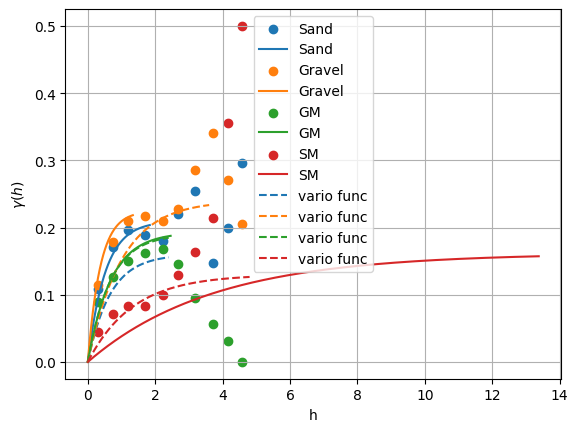

In [144]:
 #first get x position and indicator values (0 or 1)
for facies in unit.get_facies():
    x_pos,v = get_Ivalues(T1, unit, facies, 0)
    ndata = len(v)
    (hexp1, gexp1, cexp1),(hexp2, gexp2, cexp2),(hexp3, gexp3, cexp3) = gcm.variogramExp3D(x_pos,v, make_plot=False, ncla=(10, 10, 10), tol_dist=np.inf, hmax=(100, 100, 5))
    plt.scatter(hexp3, gexp3, label = facies.name)

    cm_sis_b1 = gcm.CovModel3D(elem=[("exponential", {"w":np.nan,"r":[np.nan, np.nan, np.nan]})], alpha=0, name="vario_SIS") # input variogram
    cm_fitted = estimate_SIS_covmodel(unit, T1, facies, cm_sis_b1, ignore_factor=1, hmax=np.nan, bounds=((0, 0, 0, 0), (0.25, 200, 200, 200)), plot_varExp=False)
    cm_fitted.plot_model_one_curve(3, True, label=facies.name, npts=2000)

plt.gca().set_prop_cycle(None)
for i in range(len(unit.get_facies())):
    cm = lst_covmodelB[i]
    cm.plot_model_one_curve(3, True, npts=2000, linestyle="--")

plt.legend()

x and y

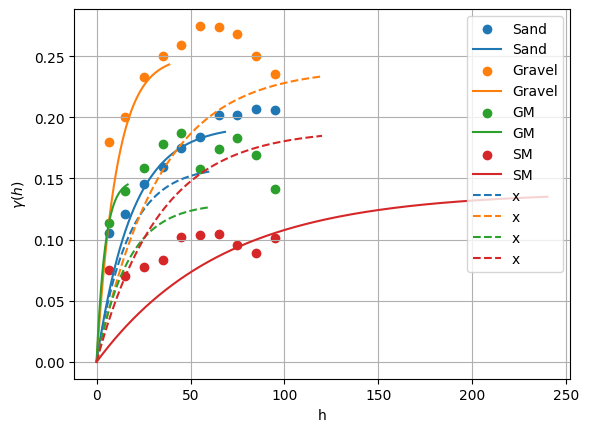

In [37]:
 #first get x position and indicator values (0 or 1)
for facies in unit.get_facies():
    x_pos,v = get_Ivalues(T1, unit, facies, 0)
    ndata = len(v)
    (hexp1, gexp1, cexp1),(hexp2, gexp2, cexp2),(hexp3, gexp3, cexp3) = gcm.variogramExp3D(x_pos,v, make_plot=False, ncla=(10, 10, 10), tol_dist=np.inf, hmax=(100, 100, 5))
    plt.scatter(hexp1, gexp1, label = facies.name)

    cm_sis_b1 = gcm.CovModel3D(elem=[("exponential", {"w":np.nan,"r":[np.nan, np.nan, np.nan]})], alpha=0, name="vario_SIS") # input variogram
    cm_fitted = estimate_SIS_covmodel(unit, T1, facies, cm_sis_b1, ignore_factor=1, hmax=np.nan, bounds=((0, 0, 0, 0), (0.25, 200, 200, 200)), plot_varExp=False)
    cm_fitted.plot_model_one_curve(1, True, label=facies.name, npts=2000)

plt.gca().set_prop_cycle(None)
for i in range(len(unit.get_facies())):
    cm = lst_covmodelB[i]
    cm.plot_model_one_curve(1, True, label="x", npts=2000, linestyle="--")

plt.legend()

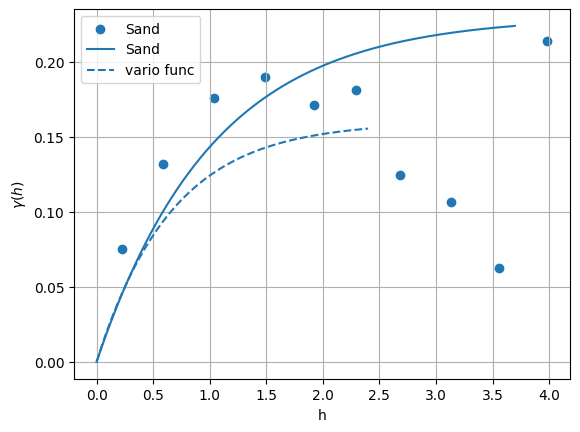

In [215]:
 #first get x position and indicator values (0 or 1)
ifa = 0

facies = unit.get_facies()[ifa]
x_pos,v = get_Ivalues(T1, unit, facies, 0)

(hexp1, gexp1, cexp1),(hexp2, gexp2, cexp2),(hexp3, gexp3, cexp3) = gcm.variogramExp3D(x_pos,v, make_plot=False, ncla=(10, 10, 10), hmax=(100, 100, 5))
plt.scatter(hexp3, gexp3, label = facies.name)

cm_sis_b1 = gcm.CovModel3D(elem=[("exponential", {"w":np.nan,"r":[np.nan, np.nan, np.nan]})], alpha=0, name="vario_SIS") # input variogram
cm_fitted = estimate_SIS_covmodel(unit, T1, facies, cm_sis_b1, ignore_factor=1, hmax=np.nan, bounds=((0, 0, 0, 0), (0.25, 200, 200, 200)), plot_varExp=False)
cm_fitted.plot_model_one_curve(3, True, label=facies.name, npts=2000)

plt.gca().set_prop_cycle(None)
cm = lst_covmodelB[ifa]
cm.plot_model_one_curve(3, True, npts=2000, linestyle="--")

plt.legend()
plt.show()

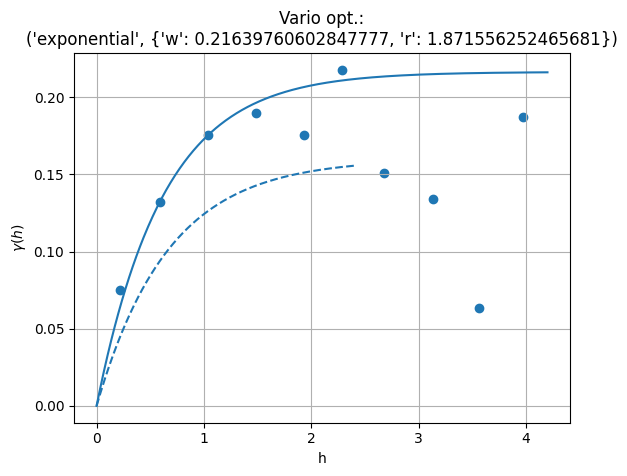

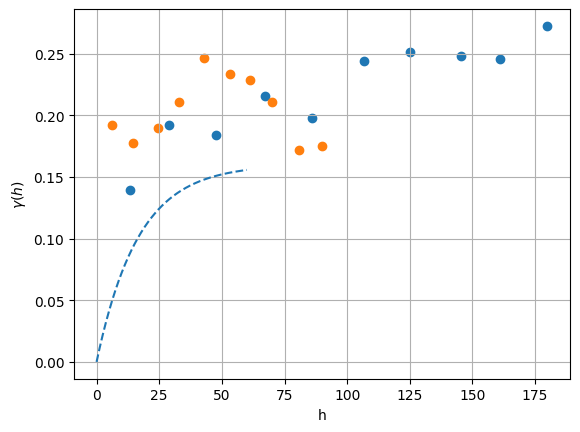

In [214]:
ifa = 0
facies = unit.get_facies()[ifa]
x_pos,v = get_Ivalues(T1, unit, facies, 0)
(h1, var1, np1), (h2, var2, np2), (h3, var3, np3) = gcm.variogramCloud3D(x_pos, v, tol_dist=(np.inf, np.inf, np.inf), make_plot=False)
(hexp1, gexp1, cexp1), (hexp2, gexp2, cexp2), (hexp3, gexp3, cexp3) = gcm.variogramExp3D(x_pos,v, make_plot=False, ncla=(10, 10, 10), tol_dist=np.inf, hmax=(200, 100, 5))

cm_to_fit = gcm.CovModel1D(elem=[("exponential", {"w":f(prop[ifa]),"r":np.nan})], name="vario_SIS")

geone.covModel.covModel1D_fit(None, None, cov_model = cm_to_fit, variogramCloud=(h3, var3, np3))

plt.scatter(hexp3, gexp3)

plt.gca().set_prop_cycle(None)
cm = lst_covmodelB[ifa]
cm.plot_model_one_curve(3, True, npts=2000, linestyle="--")

plt.show()

# show exeperimental variogram in x and y direction
plt.scatter(hexp1, gexp1)
cm.plot_model_one_curve(1, True, npts=2000, linestyle="--")
plt.scatter(hexp2, gexp2)

plt.show()

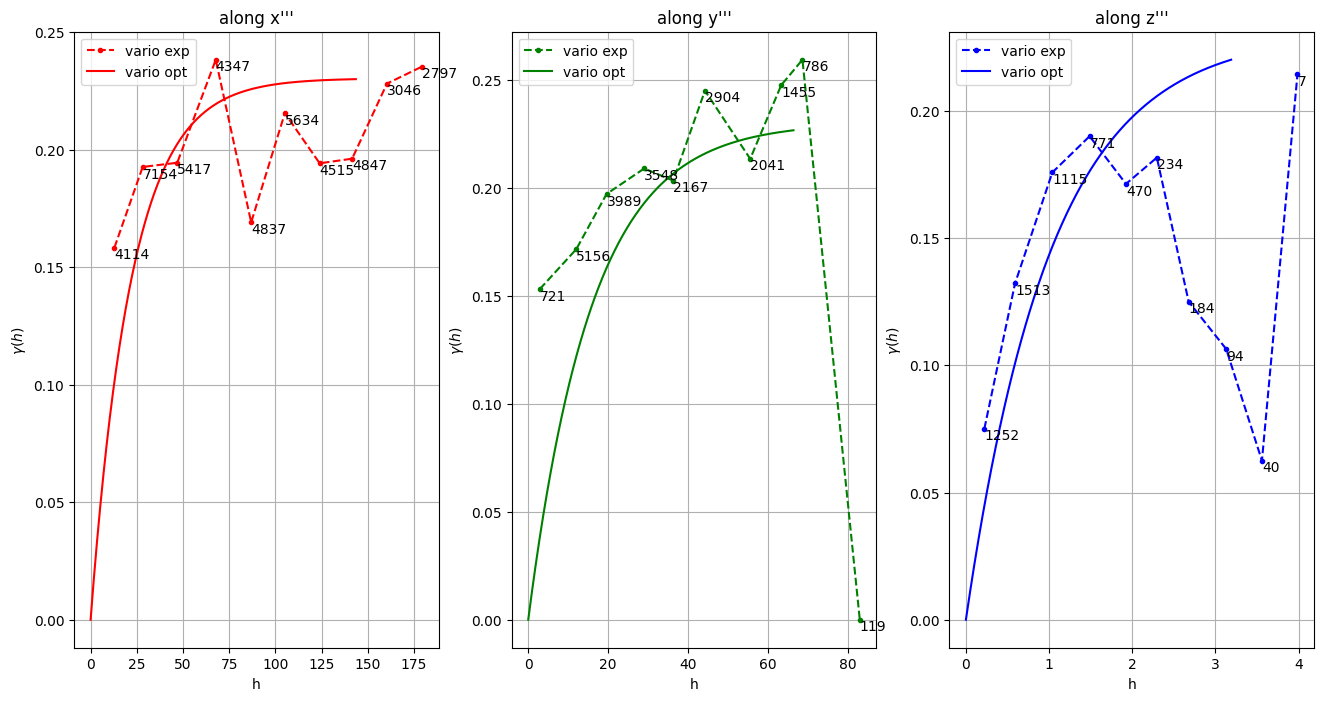

*** CovModel3D object ***
name = 'vario_SIS'
number of elementary contribution(s): 1
elementary contribution 0
    type: exponential
    parameters:
        w = 0.23042078567116764
        r = [66.71534865889775, 47.86909452215591, 3.081176982967741]
angles: alpha = 0, beta = 0.0, gamma = 0.0 (in degrees)
    i.e.: the system Ox'''y''''z''', supporting the axes of the model (ranges),
    is obtained from the system Oxyz as follows:
        Oxyz      -- rotation of angle -alpha around Oz  --> Ox'y'z'
        Ox'y'z'   -- rotation of angle -beta  around Ox' --> Ox''y''z''
        Ox''y''z''-- rotation of angle -gamma around Oy''--> Ox'''y'''z'''
*****

In [213]:
unit = T1.get_unit("B")
facies = unit.get_facies()[0]

cm_sis_b1 = gcm.CovModel3D(elem=[("exponential", {"w":np.nan,"r":[np.nan, np.nan, np.nan]})], alpha=0, name="vario_SIS") # input variogram
# fit_SIS_cms(unit, T1, cm_sis_b1, hmax_fit=(100,100,10), bounds=((0,0,0, 0), (0.25, 100, 100, 100)), ignore_factor=1, plot_varExp=True)
estimate_SIS_covmodel(unit, T1, facies, cm_sis_b1, ignore_factor=1, hmax=np.nan, bounds=((0,0,0, 0), (0.25, 200, 200, 200)), plot_varExp=True, tol_dist=(10, 10, .1))